# `Linear Regression on a Dataset`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## `Example 1` :

----------------

In [3]:
data = pd.read_csv("Crude_Indigo.csv")

In [4]:
data.head()

,Crude,Indigo
0,74.96,724.45
1,73.17,744.45
2,70.97,760.80
3,71.78,808.55
4,72.11,822.30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crude   53 non-null     float64
 1   Indigo  53 non-null     float64
dtypes: float64(2)
memory usage: 976.0 bytes


### `Crude`

<AxesSubplot:xlabel='Crude', ylabel='Density'>

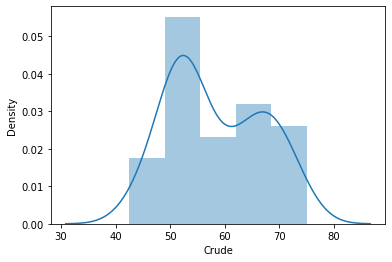

In [6]:
sns.distplot(data["Crude"])

<AxesSubplot:xlabel='Crude'>

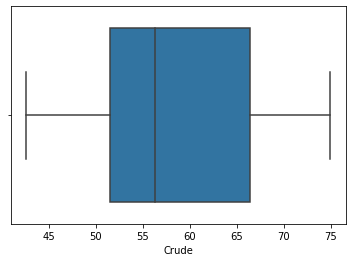

In [7]:
sns.boxplot(data["Crude"])

### `Indigo`

<AxesSubplot:xlabel='Indigo', ylabel='Density'>

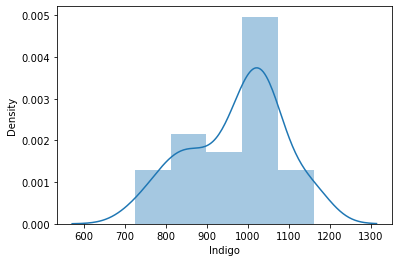

In [8]:
sns.distplot(data["Indigo"])

<AxesSubplot:xlabel='Indigo'>

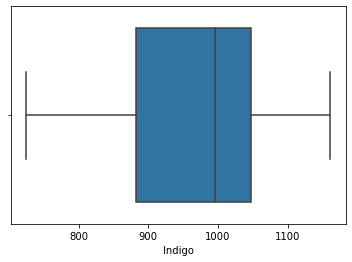

In [9]:
sns.boxplot(data["Indigo"])

### `covariance`

> **A covariance matrix is used to study the direction of the linear relationship between variables. Suppose we have two variables X and Y, then the covariance between these two variables is represented as cov(X,Y)**

![](https://lh6.googleusercontent.com/RgC5ARNcZD9GkvbN9hAEMN6ECfya4exVW01rUy_Zi_k6pdGenwzREMjU-tqQGpJbSRSoJBMf7UGDYqlOj9gOsXz15s9HP3uomgiTFbsa0mXTkVEmT3i-OmW5f64wLCw704FITGoqpRp9q_u3GQ)
![](https://www.simplilearn.com/ice9/free_resources_article_thumb/covx-y.jpg)

In [10]:
data.cov()

,Crude,Indigo
Crude,73.919548,-917.805616
Indigo,-917.805616,12690.404109


### `correlation`
>  **A correlation matrix is used to study the strength of a relationship between two variables. It not only shows the direction of the relationship, but also shows how strong the relationship is.**
![](https://lh6.googleusercontent.com/wia1VGoOCHj-XT7_DlcG9n-VZ_vs-SWx8PCSVXtdC6tlMHzWg5de2U_Lo9mdBYh3S2hevX1Ue7lO1Wc59Ud9BuG80vLW09obW4WAKr4svRYnr55BP2w4Ev-IWusYuJKhN1aZoT_qIaUgl9WEFQ)

In [11]:
data.corr()

,Crude,Indigo
Crude,1.000000,-0.947618
Indigo,-0.947618,1.000000


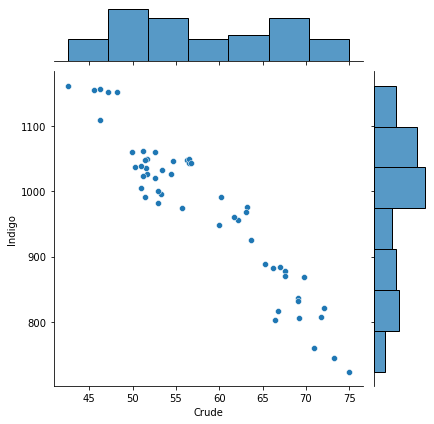

In [12]:
sns.jointplot(data["Crude"],data["Indigo"])

## 1. `Regression using statsmodel` :

In [13]:
X = data["Crude"]
y = data["Indigo"]

In [14]:
import statsmodels.api as sm

In [15]:
X.head()

0    74.96
1    73.17
2    70.97
3    71.78
4    72.11
Name: Crude, dtype: float64

In [16]:
X = sm.add_constant(X)   # adding x0 = 1 assumption
X.head()

,const,Crude
0,1.0,74.96
1,1.0,73.17
2,1.0,70.97
3,1.0,71.78
4,1.0,72.11


In [17]:
ols = sm.OLS(y,X)
ols = ols.fit()

In [18]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Indigo   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     448.9
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           6.17e-27
Time:                        08:53:26   Log-Likelihood:                -264.60
No. Observations:                  53   AIC:                             533.2
Df Residuals:                      51   BIC:                             537.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1695.8076     34.502     49.151      0.000    1626.542    1765.073
Crude        -12.4163      0.586    -21.187      0.000     -13.593     -11.240
==============================================================================
Omnibus:                        6.559   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                2.376
Skew:                          -0.062   Prob(JB):                        0.305
Kurtosis:                       1.970   Cond. No.                         407.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `f-statistic (manually)`

> **H0**: variables added does not have relation with y, x0 alone is related

> **H1**: variables added does have relation with y, x0,x1,x2...xn are related

> **f-statistic captures deviation between prediction and mean, consider all variables**

[Click here for reference](https://www.cnblogs.com/fangwenyu/p/4230337.html)

In [20]:
#################################  SSR  #####################################
y_predict = ols.predict(X)

sum1 = 0
for i in y_predict:
    sum1 = sum1 + (i - y.mean()) ** 2
SSR = sum1


################################ SSE ##########################################
sum2 = 0
for i in range(len(y)):
    sum2 = sum2 + (y[i] - y_predict[i]) ** 2   
SSE = sum2

print(f'SSE = {SSE}')
print(f'SSR = {SSR}')

SSE = 67323.09978270072
SSR = 592577.9138965431


## `F_statistic = MSR/MSE`

In [21]:
df_numerator = len(data.columns) - 1
df_denominator = (len(y) - (len(data.columns) - 1) - 1 )
MSR = SSR / df_numerator  #  k =indepndent variables
MSE = SSE / df_denominator  # n - k - 1
print(f'MSE = {MSE}')
print(f'MSR = {MSR}')
F_statistic = MSR / MSE
print('F_statistic :',F_statistic)

MSE = 1320.0607800529554
MSR = 592577.9138965431
F_statistic : 448.9019921285528


### `t-statistic  is  coef / std err`

> consider single variable at a time.

> **H0**: x1 do not have relation with y.

> **H1**: x1 have relation with y.


In [25]:
t_crude = -12.4163/0.586    
t_crude

-21.188225255972696

### `prediction`

In [162]:
##y_predict = ols.predict(X)

In [23]:
residue = y - y_predict

In [24]:
residue

0    -40.633452
1    -42.858589
2    -53.824399
3      3.982785
4     21.830157
5     39.477742
6     -0.444512
7     -5.944512
8    -30.473699
9    -67.144299
10   -49.401950
11    21.358583
12    13.508583
13    20.979631
14     8.301632
15     3.999471
16    20.385101
17    63.406149
18    56.559498
19    32.259011
20    31.104221
21    43.478131
22    -3.100102
23   -29.445118
24    51.057998
25    49.165416
26    54.615416
27    51.590299
28     0.744095
29    29.443628
30     6.534536
31    -6.105204
32   -20.024343
33   -34.493016
34    -8.540134
35   -25.196598
36   -55.565718
37   -38.840834
38   -38.310694
39   -65.393483
40   -21.537252
41   -58.027459
42   -28.406878
43   -36.765017
44    17.040260
45     1.505797
46   -16.383689
47   -13.178939
48    53.734476
49    41.297385
50    24.700481
51    -6.343328
52    34.322736
dtype: float64

## `Assumption : Normality of the residue`

<AxesSubplot:ylabel='Density'>

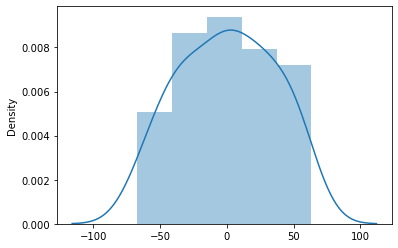

In [165]:
sns.distplot(residue)

## 2. `Regression using sklearn `:

In [26]:
X = data.Crude.values.reshape(-1,1)
y = data.Indigo

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
lrmodel = LinearRegression()
lrmodel.fit(X,y)

LinearRegression()

In [30]:
lrmodel.intercept_

1695.8076051212292

In [31]:
lrmodel.coef_

array([-12.41627738])

In [32]:
lrmodel.predict(X)

array([ 765.08345248,  787.308589  ,  814.62439924,  804.56721456,
        800.46984303,  829.77225765,  837.5945124 ,  837.5945124 ,
        836.97369853,  870.99429856,  866.15195038,  856.5914168 ,
        856.5914168 ,  863.42036936,  874.09836791,  884.90052923,
        905.01489859,  911.84385115,  912.34050225,  923.39098912,
        930.09577891,  948.47186943,  951.70010155, 1004.34511766,
        997.39200232,  994.78458407,  994.78458407,  991.05970086,
       1032.40590454, 1017.50637168, 1019.86546439, 1054.75520383,
       1055.62434325, 1071.39301552, 1056.99013376, 1063.446598  ,
       1038.36571769, 1034.64083447, 1039.11069433, 1056.49348267,
       1042.587252  , 1062.57745858, 1054.50687828, 1060.71501698,
       1042.95974032, 1060.09420311, 1076.48368925, 1121.67893893,
       1097.71552358, 1110.75261483, 1129.74951923, 1167.74332802,
       1121.92726447])

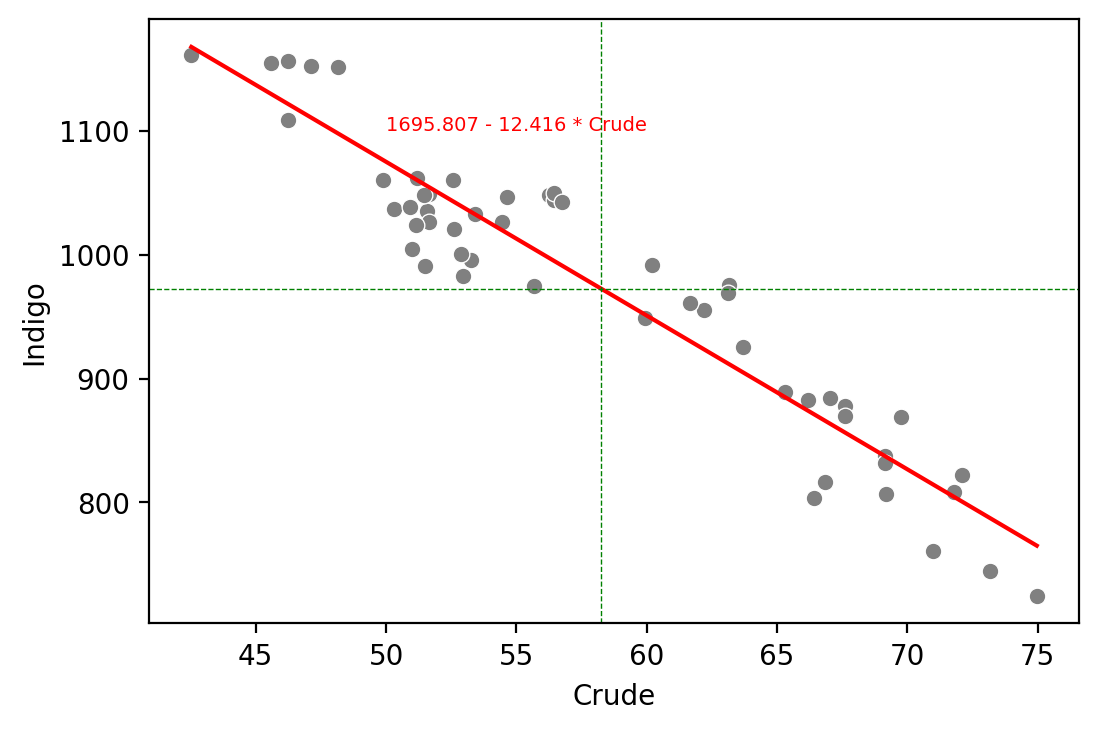

In [33]:
plt.figure(dpi=200)
sns.scatterplot(data["Crude"],data["Indigo"],color="grey")
sns.lineplot(x=data["Crude"],y=lrmodel.predict(X),color="red")
plt.annotate("1695.807 - 12.416 * Crude",(50,1100),size=7,color="red")
plt.axhline(data.Indigo.mean(),ls="--",lw=0.5,color="green")
plt.axvline(data.Crude.mean(),ls="--",lw=0.5,color="green")
plt.show()

### The point where mean of x and mean of y meet is called `centroid`. all lines will pass from here for sure.
# `End -----------------------------`